# シンプレクティック解法の誤差

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

## 比較する解法の定義

古典的ルンゲ・クッタ法

In [2]:
def RK4(t, x, f, h):
    k1 = f(t, x)
    k2 = f(t+0.5*h, x+0.5*h*k1)
    k3 = f(t+0.5*h, x+0.5*h*k2)
    k4 = f(t+h, x+h*k3)
    return x + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

ルースの方法

In [3]:
def Ruth(t, q, p, dT, dU, h):
    Q1 = q + 7 * h * dT(p) / 24
    P1 = p - 2 * h * dU(Q1) / 3
    Q1 = Q1 + 0.75 * h * dT(P1)
    P1 = P1 + 2 * h * dU(Q1) / 3
    Q1 = Q1 - h * dT(P1) / 24
    P1 = P1 - h * dU(Q1)
    return [Q1, P1]

サンセルナの方法

In [4]:
def SanzSerna(t, q, p, dT, dU, h):
    Q1 = q + 7 * h * dT(p) / 48
    P1 = p - h * dU(Q1) / 3
    Q1 = Q1 + 3 * h * dT(P1) / 8
    P1 = P1 + h * dU(Q1) / 3
    Q1 = Q1 - h * dT(P1) / 48
    P1 = P1 - h * dU(Q1)
    Q1 = Q1 - h * dT(P1) / 48
    P1 = P1 + h * dU(Q1) / 3
    Q1 = Q1 + 3 * h * dT(P1) / 8
    P1 = P1 - h * dU(Q1) / 3
    Q1 = Q1 + 7 * h * dT(P1) / 48
    P1 = P1    
    return [Q1, P1]

## Kepler問題への適用

In [5]:
def func(t,x):
    r = np.hypot(x[0], x[2])
    return np.array([x[1], -x[0]/r**3, x[3], -x[2]/r**3])

def dT(p):
    return p

def dU(q):
    r = np.hypot(q[0],q[1])
    return q/r**3

x0 = np.array([1.0, 0.0, 1.0, 1.0])
q0 = np.array([1.0, 1.0])
p0 = np.array([0.0, 1.0])

a = 0.0 # 初期時刻
# b = 2*np.pi # 最終時刻
b = 2 * np.pi * np.sqrt(7 + 5 * np.sqrt(2))
Steps = [2**n for n in range(4,17)]
H = [(b - a) / N for N in Steps]

古典的ルンゲ・クッタ法

In [6]:
# いろんな刻み幅でx(1)の近似を計算する
Err = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    x = x0
    for n in range(N):
        x = RK4(t, x, func, h)
        t = a + (n + 1) * h
    err = np.sqrt((x[0] - x0[0])**2+(x[1]-x0[1])**2+(x[2]-x0[2])**2+(x[3] - x0[3])**2)
    Err.append(err)

### Ruthの方法

In [7]:
# いろんな刻み幅でx(1)の近似を計算する
Err2 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    q,p = q0,p0
    for n in range(N):
        q,p = Ruth(t, q, p, dT, dU, h)
        t = a + (n + 1) * h
    err = np.sqrt((q[0] - q0[0])**2+(p[0]-p0[0])**2+(q[1]-q0[1])**2+(p[1] - p0[1])**2)
    Err2.append(err)

### Sanz-Serna

In [8]:
# いろんな刻み幅でx(1)の近似を計算する
Err3 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    q,p = q0,p0
    for n in range(N):
        q,p = SanzSerna(t, q, p, dT, dU, h)
        t = a + (n + 1) * h
    err = np.sqrt((q[0] - q0[0])**2+(p[0]-p0[0])**2+(q[1]-q0[1])**2+(p[1] - p0[1])**2)
    Err3.append(err)

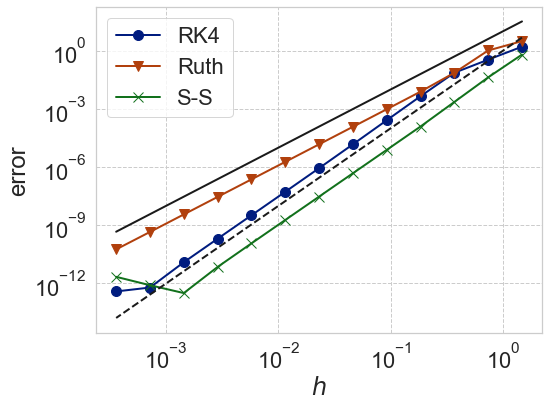

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_xlabel("$h$")
ax.set_ylabel("error")
ax.plot(H, Err, '-o', label="RK4", markersize=10)
ax.plot(H, Err2, '-v', label="Ruth", markersize=10)
ax.plot(H, Err3, '-x', label="S-S", markersize=10)
ax.plot(H, [10*h**3 for h in H], '-k')
ax.plot(H, [h**4 for h in H], '--k')
ax.legend()
# plt.savefig("kepler_error.pdf", bbox_inches='tight')

## $u'' + u - u^3=0$への適用

ハミルトニアン
$$
    H(u,v) = \frac{1}{2} u^2 - \frac{1}{4}u^4 + \frac{1}{2}v^2
$$
初期値$u(0) = 0, u'(0) = 1/\sqrt{2}$の解は
$u = \tanh(t/\sqrt{2}), v = \frac{1}{\sqrt{2}\cosh^2(t/\sqrt{2})}$

In [10]:
def func(t,x):
    return np.array([x[1], x[0]*(x[0]-1)*(x[0]+1)])

def dT(p):
    return p

def dU(q):
    return q * (1 - q * q)

x0 = np.array([0.0, np.sqrt(0.5)]) # 初期値
q0 = 0.0
p0 = np.sqrt(0.5)

In [11]:
a = 0.0 # 初期時刻
b = 1.0 # 最終時刻
Steps = [2**n for n in range(4,17)]
H = [(b - a) / N for N in Steps]

古典的ルンゲ・クッタ法

In [12]:
# いろんな刻み幅でx(1)の近似を計算する
Err = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    x = x0
    for n in range(N):
        x = RK4(t, x, func, h)
        t = a + (n + 1) * h
    err = np.hypot(x[0] - np.tanh(1/np.sqrt(2)), x[1] - 1/(np.sqrt(2)*np.cosh(1/np.sqrt(2))**2))
    Err.append(err)

ルースの方法

In [13]:
# いろんな刻み幅でx(1)の近似を計算する
Err2 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    q,p = q0,p0
    for n in range(N):
        q,p = Ruth(t, q, p, dT, dU, h)
        t = a + (n + 1) * h
    err = np.hypot(q - np.tanh(1/np.sqrt(2)), p - 1/(np.sqrt(2)*np.cosh(1/np.sqrt(2))**2))
    Err2.append(err)

サンセルナ法

In [14]:
# いろんな刻み幅でx(1)の近似を計算する
Err3 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    q,p = q0,p0
    for n in range(N):
        q,p = SanzSerna(t, q, p, dT, dU, h)
        t = a + (n + 1) * h
    err = np.hypot(q - np.tanh(1/np.sqrt(2)), p - 1/(np.sqrt(2)*np.cosh(1/np.sqrt(2))**2))
    Err3.append(err)

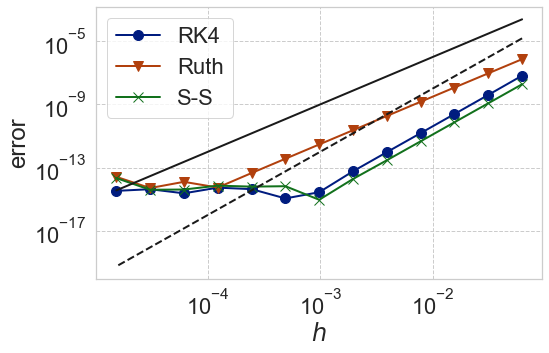

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.set_xlabel("$h$")
ax.set_ylabel("error")
ax.plot(H, Err, '-o', label="RK4", markersize=10)
ax.plot(H, Err2, '-v', label="Ruth", markersize=10)
ax.plot(H, Err3, '-x', label="S-S", markersize=10)
ax.plot(H, [h**3 for h in H], '-k')
ax.plot(H, [h**4 for h in H], '--k')
ax.legend()
# plt.savefig("polyHam_error.pdf", bbox_inches='tight')